In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import squarify
import json
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy
from scipy.stats import boxcox
import yellowbrick 
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
pd.options.display.float_format = '{:,.2f}'.format

In [24]:
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

In [25]:
data1 = pd.read_excel('/Users/THAO VAN/Desktop/data_rfm.xlsx',header = 0)


In [26]:
data1.dtypes


Customer Key     object
Recency         float64
Frequency       float64
Monetary        float64
R Score         float64
F Score         float64
M Score         float64
RFM Score       float64
dtype: object

In [27]:
data1.describe()

,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score
count,"18,484.00","18,484.00","18,484.00","18,484.00","18,484.00","18,484.00","18,484.00"
mean,174.67,3.27,"1,588.33",3.01,2.70,2.99,330.54
std,145.64,2.62,"2,124.23",1.42,1.56,1.44,145.13
min,0.00,1.00,2.29,1.00,1.00,1.00,111.00
25%,71.00,2.00,49.97,2.00,1.00,2.00,212.00
50%,153.00,3.00,270.27,3.00,3.00,3.00,332.00
75%,248.00,4.00,"2,511.28",4.00,4.00,4.00,445.00
max,"1,080.00",68.00,"13,295.38",5.00,5.00,5.00,555.00


In [17]:
data1.shape

(18485, 8)

In [28]:
data1.isnull().sum().sort_values(ascending=False)

Recency         1
Frequency       1
Monetary        1
R Score         1
F Score         1
M Score         1
RFM Score       1
Customer Key    0
dtype: int64

In [30]:
data1.dropna(inplace=True)

In [31]:
data1.isnull().sum().sort_values(ascending=False)

Customer Key    0
Recency         0
Frequency       0
Monetary        0
R Score         0
F Score         0
M Score         0
RFM Score       0
dtype: int64

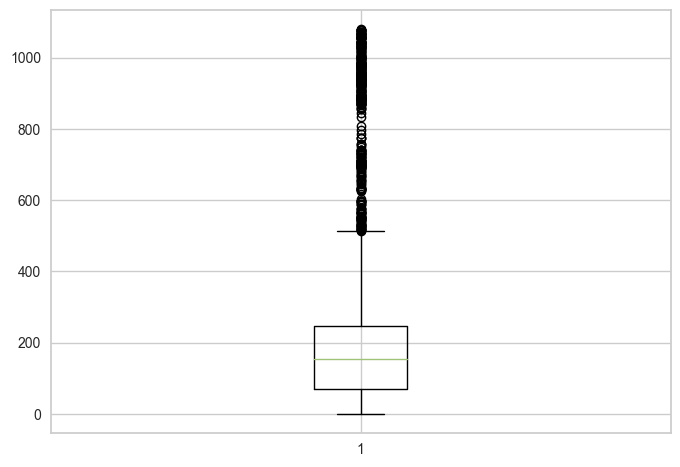

In [32]:
plt.boxplot(data1.Recency)
Q1 = data1.Recency.quantile(0.25)
Q3 = data1.Recency.quantile(0.75)
IQR = Q3 - Q1
data1 = data1[(data1.Recency >= Q1 - 1.5*IQR) & (data1.Recency <= Q3 + 1.5*IQR)]

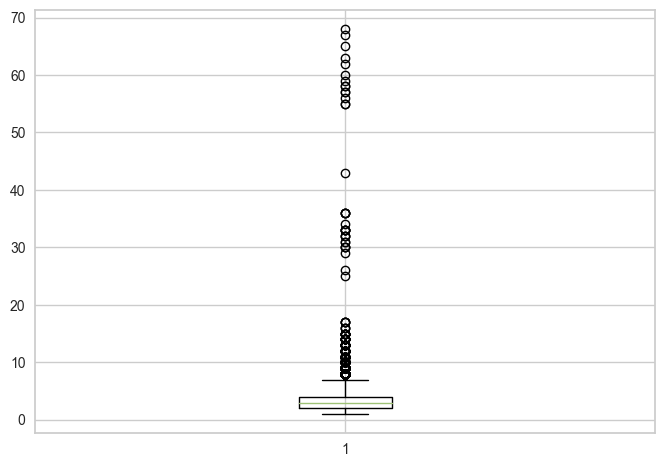

In [33]:
plt.boxplot(data1.Frequency)
Q1 = data1.Frequency.quantile(0.25)
Q3 = data1.Frequency.quantile(0.75)
IQR = Q3 - Q1
data1 = data1[(data1.Frequency >= Q1 - 1.5*IQR) & (data1.Frequency <= Q3 + 1.5*IQR)]

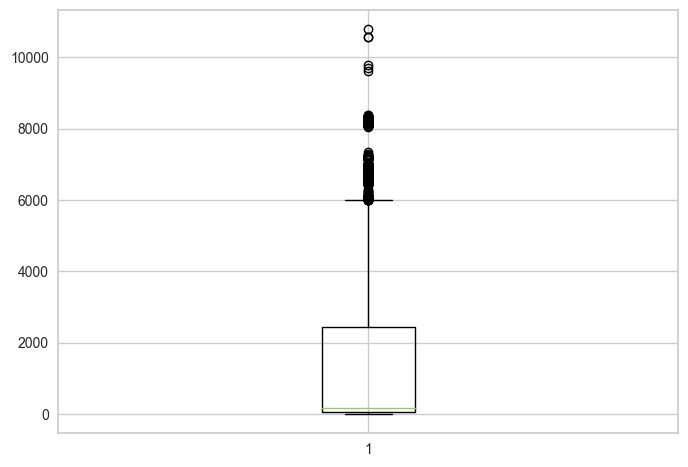

In [34]:
plt.boxplot(data1.Monetary)
Q1 = data1.Monetary.quantile(0.25)
Q3 = data1.Monetary.quantile(0.75)
IQR = Q3 - Q1
data1 = data1[(data1.Monetary >= Q1 - 1.5*IQR) & (data1.Monetary <= Q3 + 1.5*IQR)]

In [35]:
iqr = data1['Recency'].quantile(0.75) - data1['Recency'].quantile(0.25)
lim = np.abs((data1['Recency'] - data1['Recency'].median()) / iqr) < 2.22
# replace outliers with nan
data1.loc[:, ['Recency']] = data1.where(lim, np.nan)
data1.dropna(subset=['Recency'], inplace=True) # drop rows with NaN in numerical columns
data1.shape

(16744, 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0cfb1c7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0cfaac810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0cfb1d410>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0cfaae650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0cfb1e6d0>],
 'means': []}

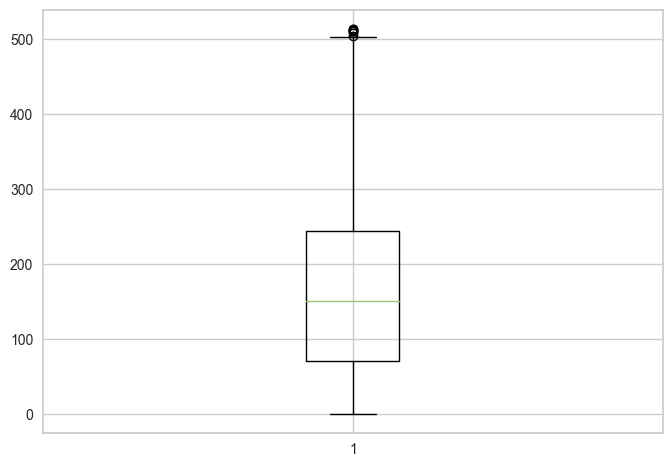

In [36]:
plt.boxplot(data1.Recency)

In [37]:
iqr = data1['Frequency'].quantile(0.75) - data1['Frequency'].quantile(0.25)
lim = np.abs((data1['Frequency'] - data1['Frequency'].median()) / iqr) < 2.22
# replace outliers with nan
data1.loc[:, ['Frequency']] = data1.where(lim, np.nan)
data1.dropna(subset=['Frequency'], inplace=True) # drop rows with NaN in numerical columns
data1.shape

(16744, 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0d00eff50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0d00ec750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0d017d410>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0d00a5510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0d00a4cd0>],
 'means': []}

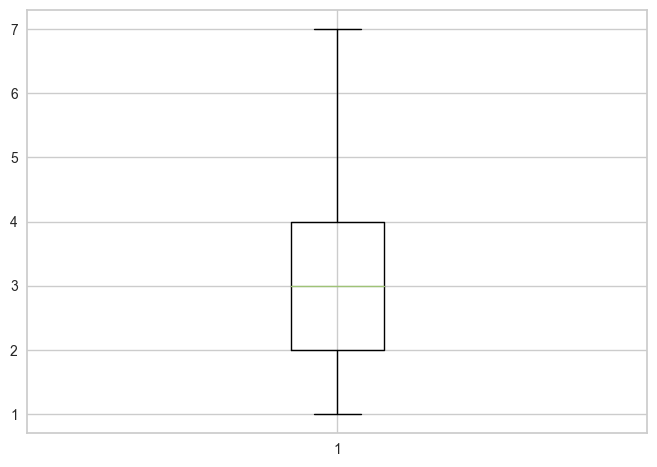

In [39]:
plt.boxplot(data1.Frequency)

In [40]:
iqr = data1['Monetary'].quantile(0.75) - data1['Monetary'].quantile(0.25)
lim = np.abs((data1['Monetary'] - data1['Monetary'].median()) / iqr) < 2.22
# replace outliers with nan
data1.loc[:, ['Monetary']] = data1.where(lim, np.nan)
data1.dropna(subset=['Monetary'], inplace=True) # drop rows with NaN in numerical columns
data1.shape

(16099, 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0d19fa890>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0cf8c80d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0d1aae850>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0cf8c96d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0cf8ca110>],
 'means': []}

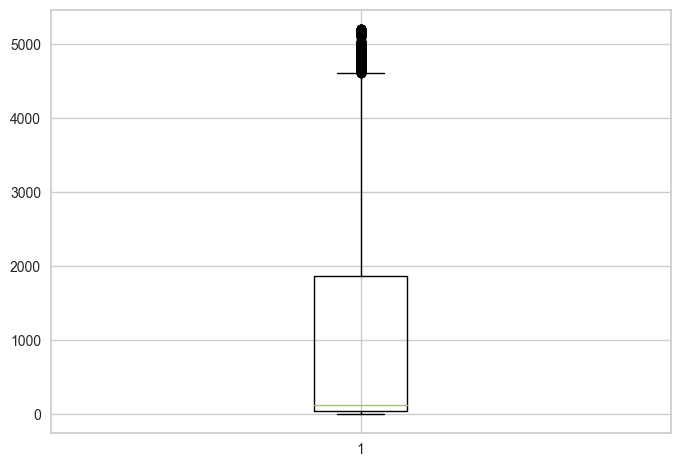

In [42]:
plt.boxplot(data1.Monetary)

In [47]:
data1['cubr_Recency']= np.cbrt(data1['Recency'])
data1['cubr_Frequency']= np.cbrt(data1['Frequency'])
data1['cubr_Monetary']= np.cbrt(data1['Monetary'])

In [48]:
data1.describe()

,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score,cubr_Recency,cubr_Frequency,cubr_Monetary
count,"16,099.00","16,099.00","16,099.00","16,099.00","16,099.00","16,099.00","16,099.00","16,099.00","16,099.00","16,099.00"
mean,161.78,2.90,"1,055.81",3.02,2.54,2.74,330.55,5.10,1.39,7.60
std,104.73,1.33,"1,449.48",1.40,1.49,1.35,142.57,1.43,0.22,4.91
min,0.00,1.00,2.29,1.00,1.00,1.00,111.00,0.00,1.00,1.32
25%,71.00,2.00,39.98,2.00,1.00,1.00,213.00,4.14,1.26,3.42
50%,150.00,3.00,119.98,3.00,3.00,3.00,332.00,5.31,1.44,4.93
75%,244.00,4.00,"1,869.58",4.00,4.00,4.00,444.00,6.25,1.59,12.32
max,513.00,7.00,"5,205.71",5.00,5.00,5.00,555.00,8.01,1.91,17.33


In [50]:
scaler = MinMaxScaler()


data1['minmax_Recency'] = scaler.fit_transform(data1[['Recency']])
data1['minmax_Frequency'] = scaler.fit_transform(data1[['Frequency']])
data1['minmax_Monetary'] = scaler.fit_transform(data1[['Monetary']])

In [54]:
scaler = StandardScaler()

# fit_transform
data1['std_Recency'] = scaler.fit_transform(data1[['Recency']])
data1['std_Frequency'] = scaler.fit_transform(data1[['Frequency']])
data1['std_Monetary'] = scaler.fit_transform(data1[['Monetary']])

In [57]:
data1['log_Recency']= np.log(data1[['Recency']])
data1['log_Frequency']= np.log(data1[['Frequency']])
data1['log_Monetary']= np.log(data1[['Monetary']])

C:\Users\THAO VAN\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [58]:
data1.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Customer Key,-0.08,-1.12
Recency,0.33,-0.88
Frequency,0.66,0.07
Monetary,1.30,0.42
R Score,-0.01,-1.28
F Score,0.26,-1.39
M Score,0.12,-1.26
RFM Score,-0.02,-1.25
cubr_Recency,-0.65,-0.10
cubr_Frequency,-0.05,-0.52


Elbow Method to determine the number of clusters to be formed:


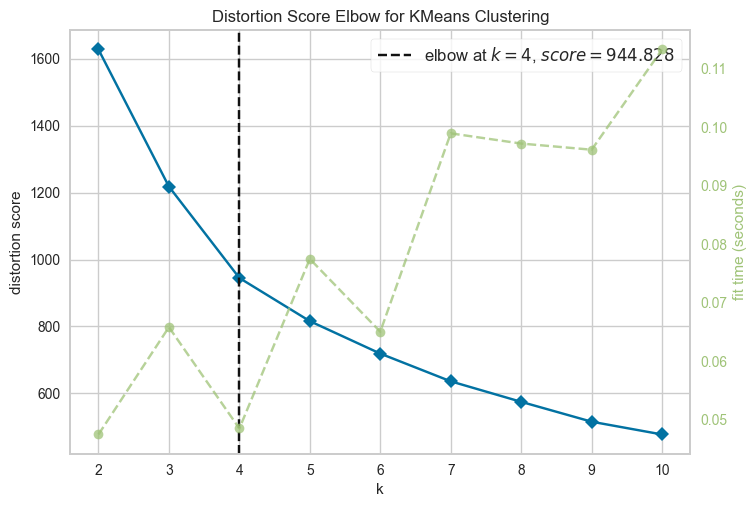

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
data1.agg(['skew','kurtosis']).transpose()

X_normal_minmax = data1[['minmax_Recency', 'minmax_Frequency', 'minmax_Monetary']]
X_normal_std = data1[['std_Recency', 'std_Frequency', 'std_Monetary']]
X_normal_log = data1[['log_Recency', 'log_Frequency', 'log_Monetary']]

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_normal_minmax)
Elbow_M.show()

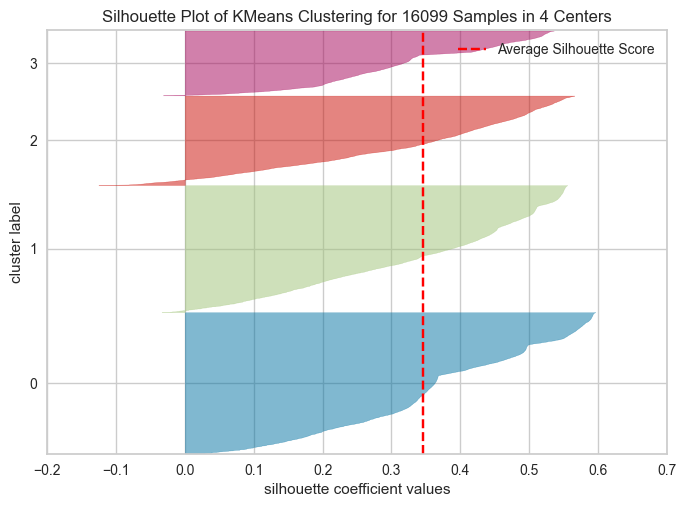

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 16099 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [62]:
# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_normal_minmax)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure